In [4]:
import numpy as np

def newton_divided_diff(x, y):
    
    """"
    Calcula la tabla de diferencias divididas de Newton.
    :param x: Lista de puntos x.
    :param y: Lista de puntos y.
    :return: Tabla de diferencias divididas.
    """""

    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
            print(f"coeficiente {coef[i][j]}")
    
    return coef

def newton_polynomial(x, y, xi):
    
    """
    Evalúa el polinomio de interpolación de Newton en un punto xi.
    :param x: Lista de puntos x.
    :param y: Lista de puntos y.
    :param xi: Punto en el que se desea evaluar el polinomio.
    :return: Valor del polinomio en xi.
    """
    
    coef = newton_divided_diff(x, y)
    n = len(x)
    result = coef[0,0]
    term = 1.0
    
    for i in range(1, n):
        term *= (xi - x[i-1])
        result += coef[0,i] * term
        print(f"Polinomio de grado {i}: {result}")
    
    return result




In [5]:
# Ejemplo de uso
# x = [1, 2, 3, 4]
# y = [1, 4, 9, 16]

x = [100, 120, 150, 180, 210]
y = [124.1, 181.9, 285.5, 457.4, 551.6]

# Evaluar el polinomio en x = 2.5
xi = 160
yi = newton_polynomial(x, y, xi)
print(f"El valor del polinomio en x = {xi} es {yi}")

coeficiente 2.8900000000000006
coeficiente 3.453333333333333
coeficiente 5.7299999999999995
coeficiente 3.1400000000000015
coeficiente 0.011266666666666652
coeficiente 0.03794444444444444
coeficiente -0.04316666666666664
coeficiente 0.0003334722222222223
coeficiente -0.0009012345679012342
coeficiente -1.1224607182940514e-05
Polinomio de grado 1: 297.5
Polinomio de grado 2: 324.53999999999996
Polinomio de grado 3: 332.5433333333333
Polinomio de grado 4: 337.9311447811447
El valor del polinomio en x = 160 es 337.9311447811447


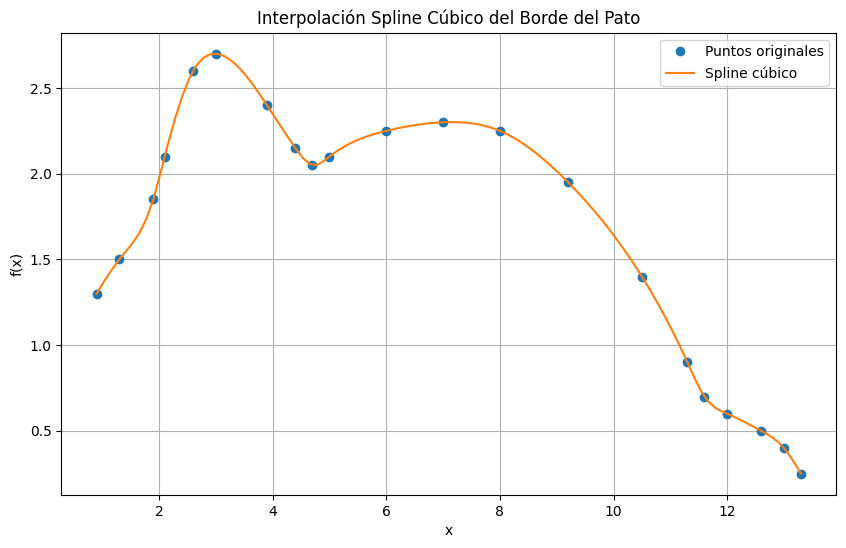

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Datos de la tabla
x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
f_x = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]  # Corregido

# Crear el spline cúbico
spline = CubicSpline(x, f_x, bc_type='natural')

# Puntos nuevos para evaluar el spline
x_new = np.linspace(min(x), max(x), 100)
f_x_new = spline(x_new)

# Graficar los puntos originales y la interpolación
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, 'o', label='Puntos originales')
plt.plot(x_new, f_x_new, '-', label='Spline cúbico')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación Spline Cúbico del Borde del Pato')
plt.grid(True)
plt.show()
